In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
r_wp = np.logspace(-1, 1.5, 20)
r_wp = (r_wp[:-1]+r_wp[1:])/2.
print r_wp
r_vpf = np.logspace(0,1.,15)
print r_vpf

[  0.11769381   0.15934284   0.21573048   0.29207236   0.39542981
   0.535363     0.72481522   0.98131006   1.32857231   1.79872241
   2.43524742   3.29702348   4.46376155   6.04338043   8.18198882
  11.07739976  14.99742768  20.3046601   27.48999565]
[  1.           1.17876863   1.38949549   1.63789371   1.93069773
   2.27584593   2.6826958    3.16227766   3.72759372   4.39397056
   5.17947468   6.1054023    7.19685673   8.48342898  10.        ]


In [3]:
zeropoint = np.load('012518_fisher_median.npz')

In [4]:
zeropoint.files

['func_all', 'param', 'func_all_cov']

In [5]:
func_zp = zeropoint['func_all']
funccov_zp = zeropoint['func_all_cov']
param_zp = zeropoint['param']

In [6]:
param_median = param_zp[0]
param_median

array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])


Out[4]:
array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])

In [3]:
points = np.random.random((10000,3))*250

In [4]:
from helpers.CorrelationFunction import ngal_wp_vpf_Pcic_jk
from halotools.mock_observables import counts_in_cylinders

In [5]:
a = np.bincount(counts_in_cylinders(points, points, 2, \
            10), minlength=100)[1:71]/float(points.shape[0])

In [9]:
b = ngal_wp_vpf_Pcic_jk(points, r_wp, 60, r_vpf, np.random.random((10,3))*250, 2, 10, 250, 2)[0][34:]

In [7]:
a

array([  8.58700000e-01,   1.28000000e-01,   1.29000000e-02,
         4.00000000e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [10]:
b

array([  8.56800000e-01,   1.29800000e-01,   1.30000000e-02,
         4.00000000e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

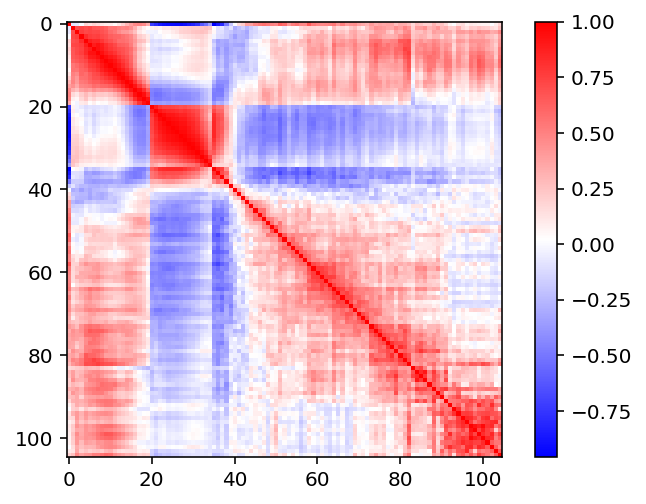

In [8]:
plt.imshow((funccov_zp[0]/np.sqrt(funccov_zp[0].diagonal())).T/np.sqrt(funccov_zp[0].diagonal()),cmap='bwr')
plt.colorbar()

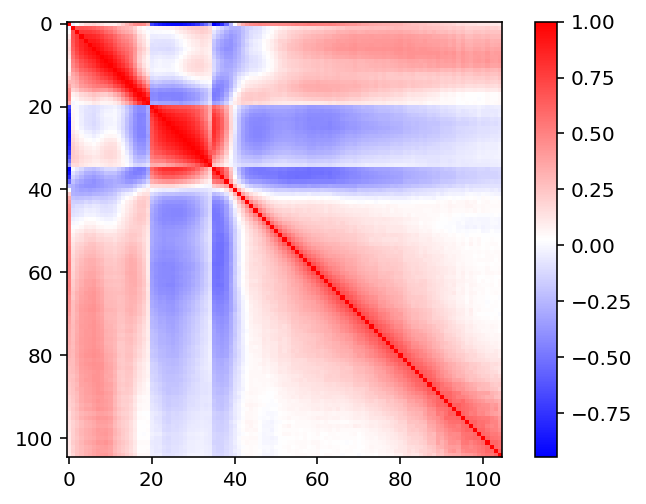

In [9]:
plt.imshow((np.mean(funccov_zp,axis=0)/np.sqrt(np.mean(funccov_zp,axis=0).diagonal())).T\
           /np.sqrt(np.mean(funccov_zp,axis=0).diagonal()),cmap='bwr')
plt.colorbar()

In [10]:
covar_real = np.cov(func_zp.T)

covar_cosmic = np.mean(funccov_zp,axis=0)   ##mean?

covar_tot = covar_cosmic+covar_real

In [18]:
pert = np.load('012518_fisher_pert_whole.npz')

In [19]:
pert.files

['i', 'func_all', 'param']

In [20]:
func = pert['func_all']
param = pert['param']
ip = pert['i']

[]

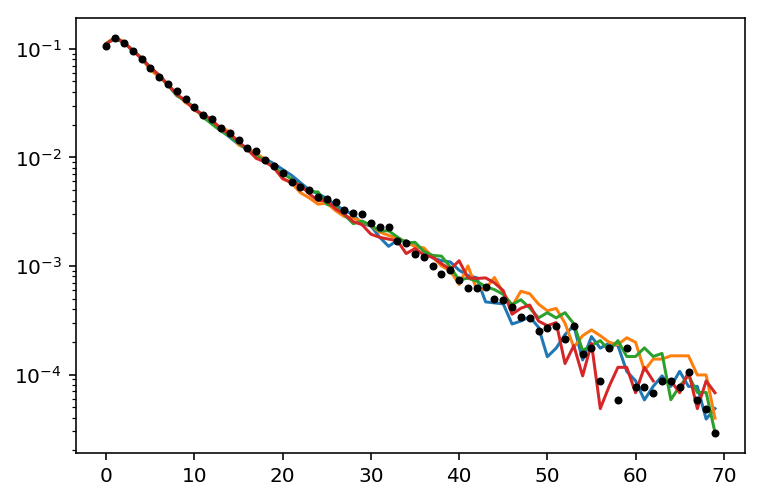

In [23]:
plt.plot(func[2000,35:])
plt.plot(func[4001,35:])
plt.plot(func[8002,35:])
plt.plot(func[3,35:])
plt.plot(func_zp[0,35:],'k.')
plt.semilogy()

In [24]:
dfdp = np.zeros((7,105))

def dfdpi(i_p,i_f):
    return np.linalg.lstsq((param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p])[:,np.newaxis],\
                           func[2000*i_p:2000*(i_p+1),i_f]-np.mean(func_zp[:,i_f],axis=0))[0]

In [25]:
for i in range(7):
    for j in range(105):
        dfdp[i,j] = dfdpi(i,j)

In [26]:
%matplotlib auto
plt.ioff()

Using matplotlib backend: TkAgg


In [27]:
def plot_dfdp(i_p,i_f):
    plt.figure()
    plt.plot(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p],func[2000*i_p:2000*(i_p+1),i_f]-np.mean(func_zp[:,i_f],axis=0),'.')
    plt.plot(np.zeros(100),func_zp[:,i_f]-np.mean(func_zp[:,i_f],axis=0),'r^')
    plt.xlabel('dp'+str(i_p))
    plt.ylabel('df'+str(i_f))
    plt.axhline(0,c='k',linestyle='--')
    plt.axvline(0,c='k',linestyle='--')
    plt.plot(np.array((min(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p]),\
                       max(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p]))),\
             np.array((min(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p]),\
                       max(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p])))*dfdp[i_p,i_f])
    plt.savefig('012618_dfdp_plots/p{}f{}'.format(i_p,i_f))
            
    plt.close()

In [28]:
for i in range(7):
    for j in range(105):
        plot_dfdp(i,j)

In [29]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covar_tot),dfdp[j]))

In [30]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.03360975  0.03292785  0.03805166  0.19102714  0.03342089  0.10064632
  0.10081402]


In [31]:
fmatrix

array([[  6.98588644e+03,  -6.13920445e+03,  -3.36752281e+03,
          2.01255394e+02,   4.79064216e+03,  -5.69525336e+01,
          4.74106675e+02],
       [ -6.13920445e+03,   8.84922535e+03,   5.06524940e+03,
          3.21687409e+02,  -6.33636475e+03,  -3.85752115e+00,
         -6.04796114e+02],
       [ -3.36752281e+03,   5.06524940e+03,   1.18232683e+04,
          5.19398572e+01,  -1.38409289e+04,  -1.26791765e+02,
         -4.06811898e+02],
       [  2.01255394e+02,   3.21687409e+02,   5.19398572e+01,
          1.25849047e+02,   1.45191654e+02,   1.02782171e+01,
         -2.79727214e+01],
       [  4.79064216e+03,  -6.33636475e+03,  -1.38409289e+04,
          1.45191654e+02,   1.76987463e+04,   1.47788708e+02,
          5.35164431e+02],
       [ -5.69525336e+01,  -3.85752115e+00,  -1.26791765e+02,
          1.02782171e+01,   1.47788708e+02,   1.12171886e+02,
         -2.34504341e+01],
       [  4.74106675e+02,  -6.04796114e+02,  -4.06811898e+02,
         -2.79727214e+01,   5.35

In [32]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i][:35],np.dot(np.linalg.inv(covar_tot[:35,:35]),dfdp[j][:35]))

In [33]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.07135284  0.07050692  0.08085176  0.43007627  0.07267367  0.20219238
  0.32181445]


In [34]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i][:20],np.dot(np.linalg.inv(covar_tot[:20,:20]),dfdp[j][:20]))

In [35]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.07962911  0.07773792  0.26019894  0.48198755  0.20329132  0.33141164
  0.45355251]
